In [63]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy.fft import fft, ifft

In [62]:
# Sampling frequency (Hz)
sample_freq = 250
# Pre-stimulus time (ms)
start_time = 500
start_idx = int(start_time * 250 / 1000)
# Total epoch time (ms)
total_time = 2840

data = scipy.io.loadmat("data/S001.mat")["data"]

In [41]:
data.shape

(8, 710, 2, 10, 12)

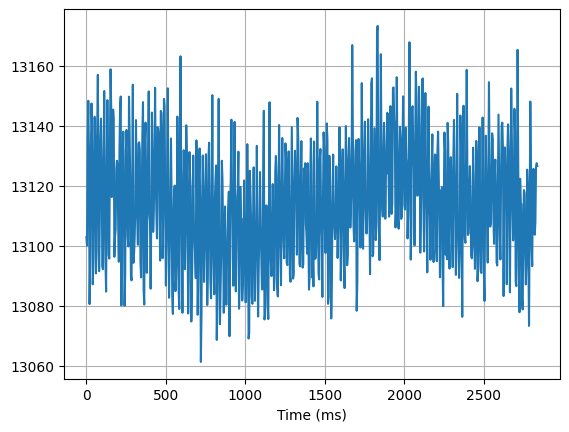

In [56]:
time_series = data[5, :, 1, 0, 1]
time_points = 1000 * np.arange(len(time_series)) / 250
plt.plot(time_points, time_series)

plt.xlabel("Time (ms)")
plt.grid()
plt.show()

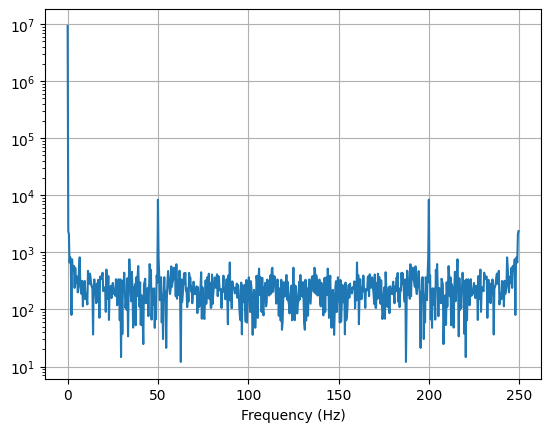

In [90]:
fig = plt.figure()

freq_points = np.arange(len(time_series)) / (total_time / 1000)
freq_series = fft(time_series)

ax = fig.add_subplot(1, 1, 1)
ax.plot(freq_points, np.abs(freq_series))
ax.set_xlabel("Frequency (Hz)")
ax.set_yscale("log")

plt.grid()
plt.show()

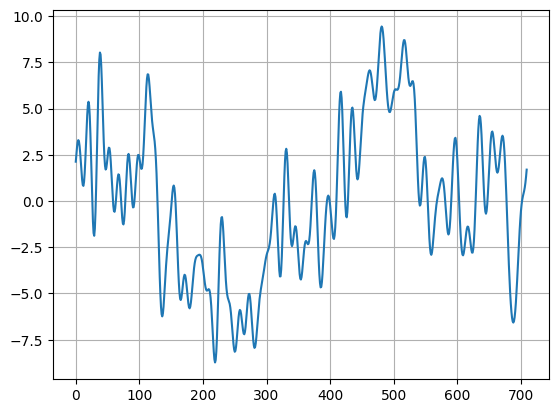

In [87]:
fig = plt.figure()
freq_series = fft(time_series)
freq_series[0] = 0
freq_series[50:] = 0
plt.plot(np.real(ifft(freq_series)))
plt.grid()
plt.show()